لمیا حنص سواری 
40348301

لطفا برای دیدن نتایج از دستور اجرای همه سلولها استفاده شود

BGD WITHOUT LIB

در مرحله اول کتابخانه ها را وارد میکنیم
csv: برای خواندن داده‌های فایل‌های CSV.
numpy: برای عملیات عددی و آرایه‌های چند بعدی.
matplotlib.pyplot: برای رسم نمودارها.
time: برای اندازه‌گیری زمان اجرای برنامه.


In [109]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import time


شروع زمان را ثبت میکنیم
و داده ها را از فایل شروع به خواندن میکنیم

In [110]:
start_time = time.time()


X = []
y = []
with open('Boston_Housing_Dataset.csv', mode='r') as file:
    reader = csv.reader(file)
    next(reader)
    for row in reader:
        X.append([float(value) for value in row[:-1]])
        y.append(float(row[-1]))


 داده‌ها را به آرایه‌های numpy تبدیل میکنیم 

In [111]:
X = np.array(X)
y = np.array(y)

محاسبه میانگین واریانس و کوواریانس ویژگی

In [112]:
mean_X = np.mean(X, axis=0)
variance_X = np.var(X, axis=0)
covariance_X = np.cov(X, rowvar=False)

print("Mean of features:", mean_X)
print("Variance of features:", variance_X)
print("Covariance matrix of features:\n", covariance_X)

Mean of features: [2.53500000e+02 3.61352356e+00 1.13636364e+01 1.11367787e+01
 6.91699605e-02 5.54695059e-01 6.28463439e+00 6.85749012e+01
 3.79504269e+00 9.54940711e+00 4.08237154e+02 1.84555336e+01
 3.56674032e+02 1.26530632e+01]
Variance of features: [2.13362500e+04 7.38403597e+01 5.42861840e+02 4.69714297e+01
 6.43854770e-02 1.34010989e-02 4.92695216e-01 7.90792473e+02
 4.42525226e+00 7.56665313e+01 2.83486236e+04 4.67772630e+00
 8.31828042e+03 5.08939794e+01]
Covariance matrix of features:
 [[ 2.13785000e+04  5.12381872e+02 -3.52578218e+02  4.00668663e+02
  -1.39603960e-01  6.75575713e+00 -8.21562673e+00  8.38722871e+02
  -9.30459360e+01  8.73364356e+02  1.64273069e+04  9.21381188e+01
  -3.93838053e+03  2.69868842e+02]
 [ 5.12381872e+02  7.39865782e+01 -4.02159560e+01  2.39923388e+01
  -1.22108643e-01  4.19593894e-01 -1.32503785e+00  8.54053223e+01
  -6.87672154e+00  4.68477610e+01  8.44821538e+02  5.39933079e+00
  -3.02381816e+02  2.79861679e+01]
 [-3.52578218e+02 -4.02159560e+0


 تنظیم seed برای ثابت ماندن ترتیب تصادفی

  تابع دوم یک آرایه از ایندکس‌ها (شماره ردیف‌ها) به طور تصادفی می‌سازد. سپس، از این ایندکس‌ها برای تقسیم داده‌ها به دو بخش آموزش و تست استفاده می‌شود.

In [113]:
np.random.seed(42)
indices = np.random.permutation(len(X))


تقسیم داده های آموزشی به نسبت 80-20

In [114]:
train_size = int(0.8 * len(X))
train_indices = indices[:train_size]
test_indices = indices[train_size:]

X_train = X[train_indices]
y_train = y[train_indices]
X_test = X[test_indices]
y_test = y[test_indices]

 استانداردسازی داده‌ها


In [115]:
X_train_mean = np.mean(X_train, axis=0)
X_train_std = np.std(X_train, axis=0)
X_train = (X_train - X_train_mean) / X_train_std
X_test = (X_test - X_train_mean) / X_train_std


تعریف توابع خطا

In [116]:
def compute_mse(X, y, weights, bias):
    y_pred = np.dot(X, weights) + bias
    mse = np.mean((y - y_pred) ** 2)
    return mse


def compute_sse(X, y, weights, bias):
    y_pred = np.dot(X, weights) + bias
    sse = np.sum((y - y_pred) ** 2)
    return sse

تعریف تابع گرادیان نزولی با شرط توقف مد نظر تمرین و تنظیم پارامترها

In [117]:
def gradient_descent(X_train, y_train, learning_rate, iterations, threshold=1e-3):
    n_samples, n_features = X_train.shape
    weights = np.random.randn(n_features) * 0.01
    bias = 0
    sse_history = []  
    mse_history = []  
    for i in range(iterations):
        y_pred = np.dot(X_train, weights) + bias
        error = y_train - y_pred

        weights_grad = -np.dot(X_train.T, error)
        bias_grad = -np.sum(error)

        weights -= learning_rate * weights_grad / n_samples
        bias -= learning_rate * bias_grad / n_samples

        sse = compute_sse(X_train, y_train, weights, bias)  
        mse = compute_mse(X_train, y_train, weights, bias)  
        
        sse_history.append(sse)
        mse_history.append(mse)

        
        if i >= 200 and abs(sse_history[-1] - sse_history[-2]) < threshold:
            print(f"Early stopping at iteration {i + 1} due to small change in SSE.")
            break

    return weights, bias, mse_history, sse_history

learning_rate = 0.01
iterations = 400
threshold = 1e-2

 اجرای الگوریتم گرادیان نزولی
و چاپ نتایج مد نظر تمرین 

In [118]:
weights, bias, mse_history, sse_history = gradient_descent(X_train, y_train, learning_rate, iterations, threshold)

print(f"Final weights: {weights}")
print(f"Final bias: {bias}")
final_sse = sse_history[-1]
final_mse = mse_history[-1]
print(f"Final SSE: {final_sse}")
print(f"Final MSE: {final_mse}")

mse_test = compute_mse(X_test, y_test, weights, bias)
print(f"Test MSE: {mse_test}")


end_time = time.time()
cpu_time1 = end_time - start_time
print(f"CPU time1: {cpu_time1:.2f} seconds")

Final weights: [ 0.16137111 -0.6836556   0.58043383 -0.64726928  0.69933611 -0.93894223
  3.21491712 -0.01126581 -2.09030079  0.78477597 -0.6792378  -1.75190651
  0.84965218 -3.48424063]
Final bias: 22.10170342687457
Final SSE: 9408.79113305562
Final MSE: 23.28908696300896
Test MSE: 21.88702406554821
CPU time1: 0.16 seconds


رسم نمودارها

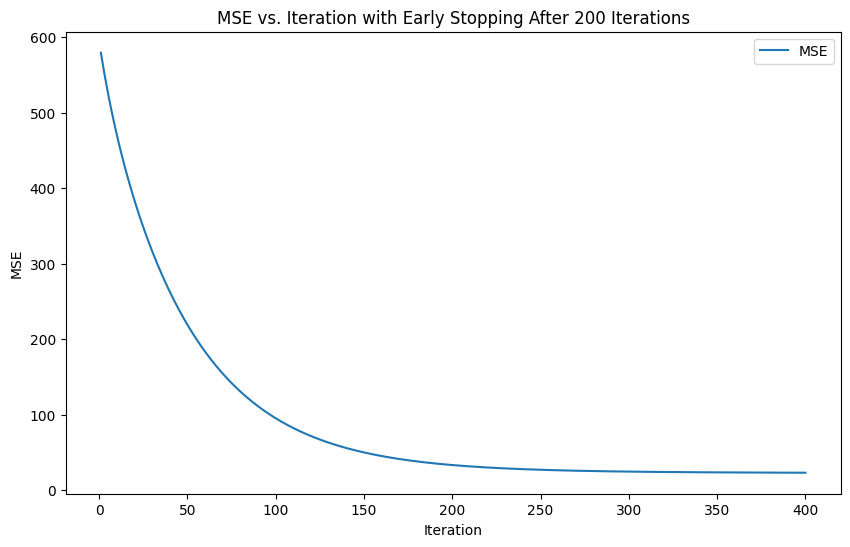

In [119]:

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(mse_history) + 1), mse_history, label="MSE")
plt.xlabel("Iteration")
plt.ylabel("MSE")
plt.title("MSE vs. Iteration with Early Stopping After 200 Iterations")
plt.legend()
plt.show()

نمودار تغییرات خطای تست بر حسب تغییر تعداد داده های آموزشی

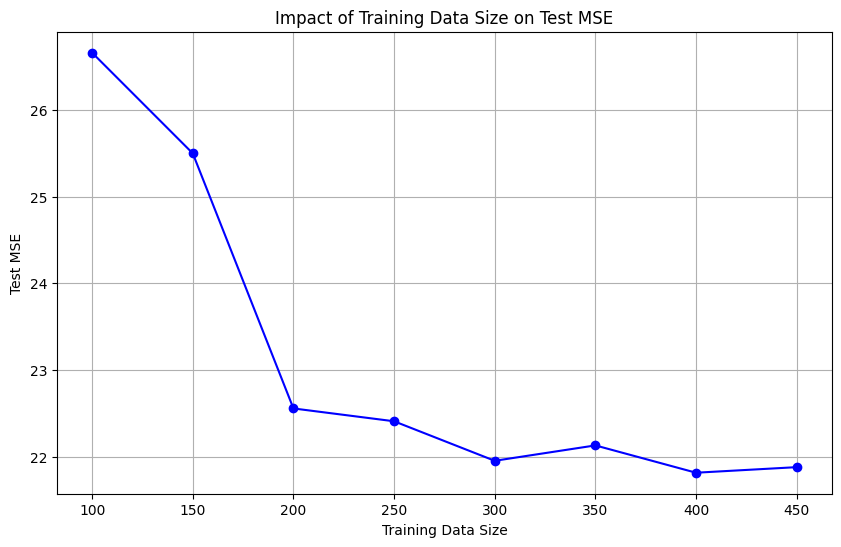

In [120]:
train_sizes = range(100, 451, 50)
mse_test_values_by_train_size = []


for size in train_sizes:
    
    X_train_sample = X_train[:size]
    y_train_sample = y_train[:size]

    
    weights, bias, _, _ = gradient_descent(X_train_sample, y_train_sample, learning_rate, iterations, threshold)

    
    mse_test = compute_mse(X_test, y_test, weights, bias)
    mse_test_values_by_train_size.append(mse_test)


plt.figure(figsize=(10, 6))
plt.plot(train_sizes, mse_test_values_by_train_size, marker='o', color='b', linestyle='-')
plt.xlabel("Training Data Size")
plt.ylabel("Test MSE")
plt.title("Impact of Training Data Size on Test MSE")
plt.grid()
plt.show()

نمودار تغییرات خطای داده های تست بر اساس تغییرات نرخ یادگیری

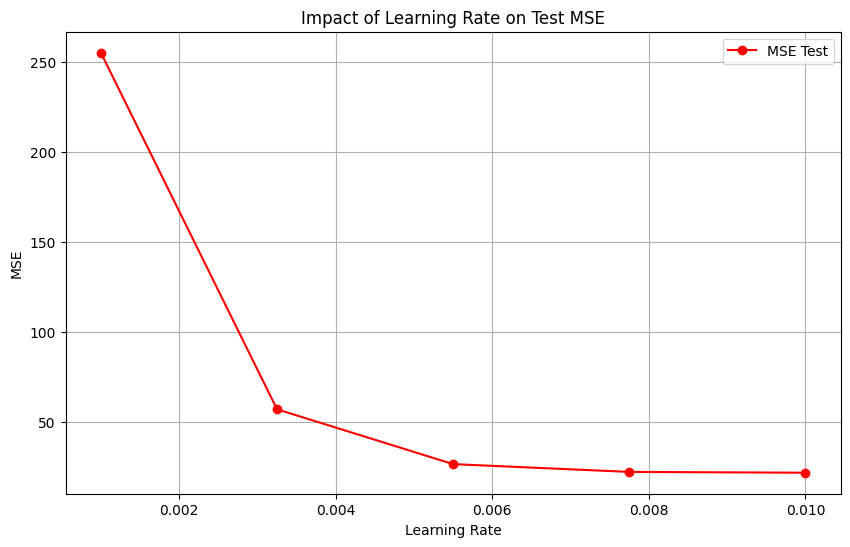

In [121]:
learning_rates = np.linspace(0.001, 0.01, 5)
mse_train_values = []
mse_test_values = []


for lr in learning_rates:
    weights, bias, mse_history, _ = gradient_descent(X_train, y_train, lr, iterations, threshold)
    
 
    mse_test = compute_mse(X_test, y_test, weights, bias)
    
  
    mse_test_values.append(mse_test)


plt.figure(figsize=(10, 6))
plt.plot(learning_rates, mse_test_values, marker='o', color='r', label='MSE Test')
plt.xlabel("Learning Rate")
plt.ylabel("MSE")
plt.title("Impact of Learning Rate on Test MSE")
plt.legend()
plt.grid()
plt.show()



بررسی داده نمونه 89

In [122]:

test_index = 89
X_test_sample = X_test[test_index]
y_test_actual = y_test[test_index]

y_test_predicted = np.dot(X_test_sample, weights) + bias
print(f"Actual value for test sample 89: {y_test_actual}")
print(f"Predicted value for test sample 89: {y_test_predicted}")
error_sample = abs(y_test_actual - y_test_predicted)
print(f"Absolute error for test sample 89: {error_sample}")


Actual value for test sample 89: 19.8
Predicted value for test sample 89: 23.44455013228491
Absolute error for test sample 89: 3.644550132284909


BGD WITH LIB

کلاس LinearRegression از روش حداقل مربعات (OLS) برای پیدا کردن بهترین وزن‌ها و بایاس استفاده می‌کند، که یک روش مستقیم است و نیازی به تنظیم نرخ یادگیری (learning rate) ندارد. در واقع، نرخ یادگیری در این الگوریتم تاثیری ندارد زیرا وزن‌ها به صورت مستقیم با استفاده از جبر خطی و بدون به‌روزرسانی تدریجی (مثل گرادیان کاهشی) محاسبه می‌شوند.پس با این کتابخانه نمیتوانیم نمودار تغییرات خطای تست بر حسب نرخ های یادگیری مختلف را داشته باشیم ولی در ادامه سعی شده با کمک استاکستیک و تابع فیت شبیه سازی شود

کتابخانه ها فراخوانی می شوند.

In [123]:
import pandas as pd   #برای خواندن داده ها از فایل
from sklearn.model_selection import train_test_split  #جداسازی داده ها
from sklearn.preprocessing import StandardScaler  #استاندارد سازی داده ها
from sklearn.linear_model import LinearRegression  #رگرسیون خطی
from sklearn.metrics import mean_squared_error  #میانگین مربع خطا


وقتی که از random seed استفاده می‌کنیم، مطمئن می شویم که همان داده‌های آموزش و تست تولید می‌شوند و مقادیر اولیه ثابت هستند در نتیجه با تکرار اجرا خروجی تغییر نمی کند


داده ها بارگزاری تقسیم بندی و نرمالسازی می شوند.

In [124]:
np.random.seed(42)

data = pd.read_csv('boston_housing_dataset.csv')

X = data.drop(columns='medv').values
y = data['medv'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

تعریف و آموزش مدل رگرسیون خطی پیش بینی و چاپ نتایج

In [125]:
start_time = time.time()

model = LinearRegression()

max_epochs = 200
threshold = 1e-2
prev_sse = float('inf')


for epoch in range(max_epochs):
    model.fit(X_train, y_train)
    
  
    y_train_pred = model.predict(X_train)


    sse_train = np.sum((y_train - y_train_pred) ** 2)
    
    if abs(prev_sse - sse_train) < threshold:
        print(f"Algorithm stopped at epoch {epoch + 1} due to small change in SSE.")
        break
    
  
    prev_sse = sse_train

end_time = time.time()
cpu_time2 = end_time - start_time

weights = model.coef_
bias = model.intercept_

y_test_pred = model.predict(X_test)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)


def sse(y_true, y_pred):
    return np.sum((y_true - y_pred) ** 2)


sse_train = sse(y_train, y_train_pred)
sse_test = sse(y_test, y_test_pred)

print(f"Final Weights: {weights}")
print(f"Final Bias: {bias}")
print(f"Train MSE: {mse_train:.4f}")
print(f"Test MSE: {mse_test:.4f}")
print(f"Train SSE: {sse_train:.4f}")
print(f"Test SSE: {sse_test:.4f}")
print(f"cpu_time2: {cpu_time2:.2f} seconds")

Algorithm stopped at epoch 2 due to small change in SSE.
Final Weights: [-0.49398125 -1.00441943  0.74705409  0.29990035  0.71145431 -1.99128619
  3.17910682 -0.30525727 -3.14196743  2.5108087  -1.64672703 -2.02904438
  1.1358693  -3.63787224]
Final Bias: 22.796534653465375
Train MSE: 21.5268
Test MSE: 24.4978
Train SSE: 8696.8092
Test SSE: 2498.7776
cpu_time2: 0.00 seconds


نمودار تغییرات خطای تست بر حسب تغییر تعداد نمونه ها

در حلقه مدل را با تعداد داده های آموزشی مختلف آموزش می دهیم و نتایج را با رسم نمودار نشان می دهیم

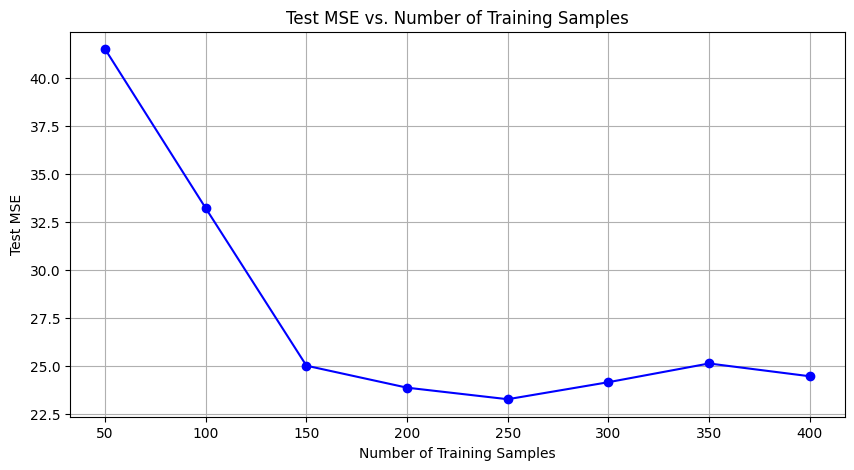

In [126]:
mse_test_values = []
train_sizes = range(50, X_train.shape[0], 50)

for size in train_sizes:
    
    model = LinearRegression()
    model.fit(X_train[:size], y_train[:size])
    y_test_pred = model.predict(X_test)
    mse_test_values.append(mean_squared_error(y_test, y_test_pred))

plt.figure(figsize=(10, 5))
plt.plot(train_sizes, mse_test_values, marker='o', color='b')
plt.xlabel("Number of Training Samples")
plt.ylabel("Test MSE")
plt.title("Test MSE vs. Number of Training Samples")
plt.grid()
plt.show()


همانطور که گفتیم کلاس کد بالا قابلیت تنظیم نرخ یادگیری را ندارد در نتیجه نمیتوانیم نمودار تغییرات خطا بر اساس نرخ یادگیری را رسم کنیم برای رسم این نمودار در کلاس sgd از تابع fit به جای partial fit استفاده میکنیم که داده ها را به طور کامل به مدل بدهد و بعد وزن ها اپدیت شوند. در این صورت ما تقریبا رفتار bgd را شبیه سازی کردیم و نمودار مورد نظر تمرین را رسم میکنیم!

In [127]:
from sklearn.linear_model import SGDRegressor

In [128]:
np.random.seed(42)
data = pd.read_csv('boston_housing_dataset.csv') 

X = data.drop(columns='medv').values  
y = data['medv'].values            

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


شروع الگوریتم

In [129]:
sgd_regressor = SGDRegressor(
    loss='squared_error',
    learning_rate='constant',
    eta0=0.01,
    max_iter=1,
    tol=None,
    random_state=50
)

start_time = time.time()

prev_sse = float('inf')
threshold = 1e-2
max_epochs = 200

for epoch in range(max_epochs):
    sgd_regressor.fit(X_train, y_train)

    y_train_pred = sgd_regressor.predict(X_train)
    y_test_pred = sgd_regressor.predict(X_test)

    sse_train = np.sum((y_train - y_train_pred) ** 2)

    if abs(prev_sse - sse_train) < threshold:
        print(f"Stopped early at epoch {epoch + 1} due to SSE difference < {threshold}")
        break

    prev_sse = sse_train

end_time = time.time()
cpu_time3 = end_time - start_time

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
sse_test = np.sum((y_test - y_test_pred) ** 2)

print("cpu_time3:", cpu_time3)
print("Final Weights:", sgd_regressor.coef_)
print("Final Bias:", sgd_regressor.intercept_)
print("Train MSE:", mse_train)
print("Test MSE:", mse_test)
print("Train SSE:", prev_sse)
print("Test SSE:", sse_test)


Stopped early at epoch 2 due to SSE difference < 0.01
cpu_time3: 0.004986763000488281
Final Weights: [-0.09252591 -0.23010442  0.45507127 -0.0765801   0.87931164 -0.74949211
  3.12990162  0.01008495 -1.77516339  0.761366    0.04025578 -1.90375328
  0.74127306 -3.66353984]
Final Bias: [22.51430598]
Train MSE: 24.151031477945555
Test MSE: 24.553910358936715
Train SSE: 9757.016717090004
Test SSE: 2504.498856611545


نمودار تغییرات خطای تست بر حسب تغییر تعداد نمونه

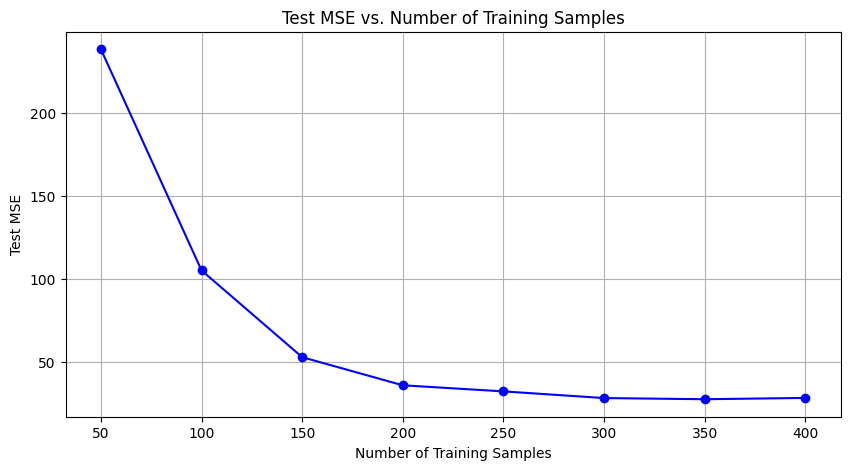

In [130]:
mse_test_values = []
train_sizes = range(50, X_train.shape[0], 50)

for size in train_sizes:
    sgd_regressor.fit(X_train[:size], y_train[:size])  
    y_test_pred = sgd_regressor.predict(X_test)
    mse_test_values.append(mean_squared_error(y_test, y_test_pred))
  
plt.figure(figsize=(10, 5))
plt.plot(train_sizes, mse_test_values, marker='o', color='b')
plt.xlabel("Number of Training Samples")
plt.ylabel("Test MSE")
plt.title("Test MSE vs. Number of Training Samples")
plt.grid()
plt.show()

نمودار تغییرات خطای تست بر حسب تغییرات نرخ یادگیری که کمتر از دو واحد نوسان دارد

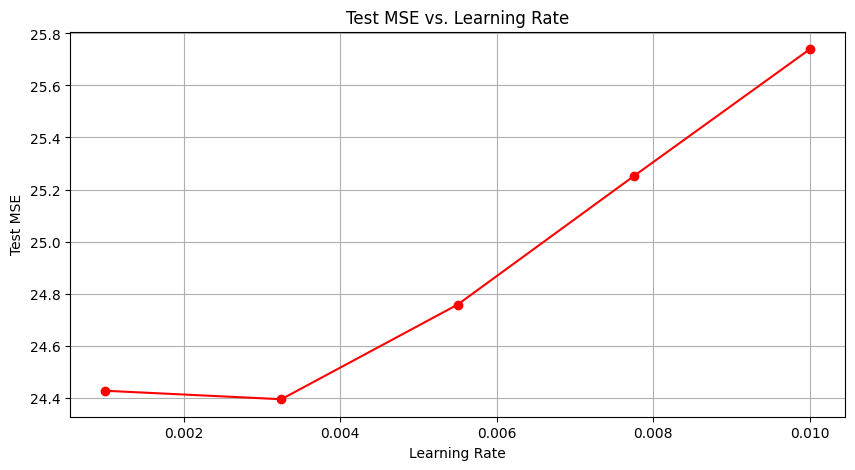

In [131]:
mse_test_values = []
learning_rates = np.linspace(0.001, 0.01, 5)

for lr in learning_rates:
    sgd_regressor = SGDRegressor(
        loss='squared_error', 
        learning_rate='constant', 
        eta0=lr,  
        max_iter=200,
        tol=None,
        random_state=50
    )
    sgd_regressor.fit(X_train, y_train)
    y_test_pred = sgd_regressor.predict(X_test)
    mse_test_values.append(mean_squared_error(y_test, y_test_pred))
    

plt.figure(figsize=(10, 5))
plt.plot(learning_rates, mse_test_values, marker='o', color='r')
plt.xlabel("Learning Rate")
plt.ylabel("Test MSE")
plt.title("Test MSE vs. Learning Rate")
plt.grid()
plt.show()


SGD WITHOUT LIB

با شافل

تنظیم رندوم سید، استخراج،نرمالسازی و جدا کردن تست و آموزشی

In [132]:
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

data = pd.read_csv('boston_housing_dataset.csv')
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

def train_test_split(X, y, test_size=0.2): 
    indices = np.random.permutation(len(X))  
    X, y = X[indices], y[indices]
    split_index = int(len(X) * (1 - test_size))
    X_train, X_test = X[:split_index], X[split_index:]
    y_train, y_test = y[:split_index], y[split_index:]
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split(X, y)


mean_X_train = np.mean(X_train, axis=0)
std_X_train = np.std(X_train, axis=0)
X_train = (X_train - mean_X_train) / std_X_train
X_test = (X_test - mean_X_train) / std_X_train

تعریف توابع، اجرای الگوریتم و نمودارها

In [133]:
X_train = np.c_[np.ones(X_train.shape[0]), X_train]
X_test = np.c_[np.ones(X_test.shape[0]), X_test]


def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def sse(y_true, y_pred):
    return np.sum((y_true - y_pred) ** 2)


def sgd(X, y, lr=0.01, epochs=200, time_limit=cpu_time1):
    n_samples, n_features = X.shape
    weights = np.random.randn(n_features) * 0.01  
    start_time = time.time()

    for epoch in range(epochs):

        for i in range(n_samples):
            y_pred = np.dot(X[i], weights)  
            gradient = -(y[i] - y_pred) * X[i]  
            weights -= lr * gradient  

        if time.time() - start_time > time_limit: 
            print(f"Stopped due to time limit at epoch {epoch + 1}")
            return weights, epoch + 1

    return weights, epochs

weights, stopped_epoch = sgd(X_train, y_train, lr=0.01)

y_train_pred = np.dot(X_train, weights)
y_test_pred = np.dot(X_test, weights)

sse_train = sse(y_train, y_train_pred)
mse_test = mse(y_test, y_test_pred)

print("Final Weights:", weights)
print("Stopped Epoch:", stopped_epoch)
print("Train SSE:", sse_train)
print("Test MSE:", mse_test)


Stopped due to time limit at epoch 109
Final Weights: [22.45087445 -0.33603775 -1.08409883  0.83554457 -0.16679162  0.8407037
 -2.06615439  2.7061296   0.23357483 -3.49208112  2.92000901 -2.24358623
 -1.91727106  1.19117324 -4.46529626]
Stopped Epoch: 109
Train SSE: 9172.467222379135
Test MSE: 22.26375005496815


رسم نمودارها

Stopped due to time limit at epoch 185
Stopped due to time limit at epoch 156
Stopped due to time limit at epoch 113
Stopped due to time limit at epoch 116
Stopped due to time limit at epoch 70
Stopped due to time limit at epoch 161
Stopped due to time limit at epoch 105
Stopped due to time limit at epoch 75
Stopped due to time limit at epoch 82
Stopped due to time limit at epoch 74
Stopped due to time limit at epoch 69
Stopped due to time limit at epoch 72
Stopped due to time limit at epoch 59
Stopped due to time limit at epoch 69
Stopped due to time limit at epoch 77


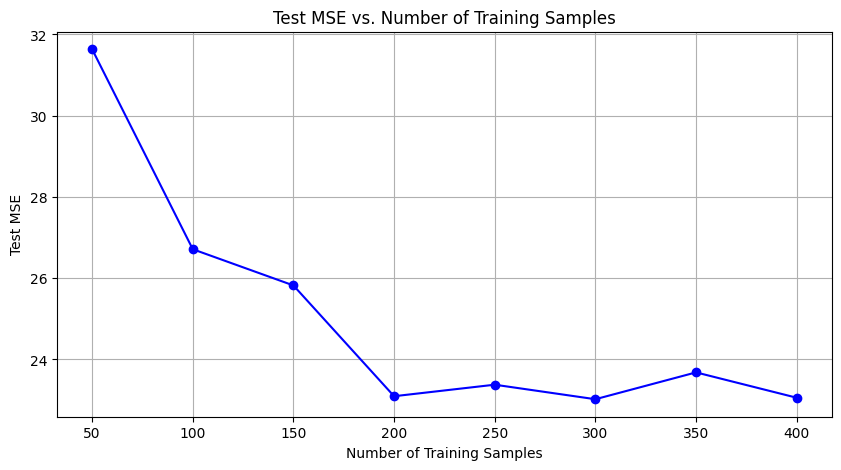

Stopped due to time limit at epoch 85
Stopped due to time limit at epoch 89
Stopped due to time limit at epoch 81
Stopped due to time limit at epoch 62
Stopped due to time limit at epoch 71
Stopped due to time limit at epoch 74
Stopped due to time limit at epoch 85
Stopped due to time limit at epoch 97
Stopped due to time limit at epoch 92
Stopped due to time limit at epoch 80
Stopped due to time limit at epoch 86
Stopped due to time limit at epoch 100
Stopped due to time limit at epoch 82
Stopped due to time limit at epoch 105
Stopped due to time limit at epoch 105


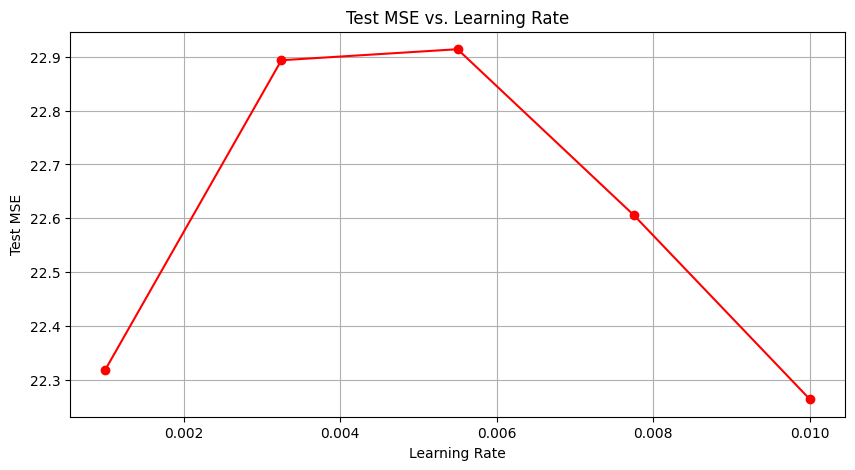

In [134]:
mse_test_values = []
train_sizes = range(50, len(X_train), 50)

for size in train_sizes:
    mse_runs = []
    for _ in range(3):
        weights, _ = sgd(X_train[:size], y_train[:size], lr=0.01)
        y_test_pred = np.dot(X_test, weights)
        mse_runs.append(mse(y_test, y_test_pred))
    mse_test_values.append(np.mean(mse_runs))

plt.figure(figsize=(10, 5))
plt.plot(train_sizes, mse_test_values, marker='o', color='b')
plt.xlabel("Number of Training Samples")
plt.ylabel("Test MSE")
plt.title("Test MSE vs. Number of Training Samples")
plt.grid()
plt.show()

mse_test_values = []
learning_rates = np.linspace(0.001, 0.01, 5)

for lr in learning_rates:
    mse_runs = []
    for _ in range(3):
        weights, _ = sgd(X_train, y_train, lr=lr)
        y_test_pred = np.dot(X_test, weights)
        mse_runs.append(mse(y_test, y_test_pred))
    mse_test_values.append(np.mean(mse_runs))

plt.figure(figsize=(10, 5))
plt.plot(learning_rates, mse_test_values, marker='o', color='r')
plt.xlabel("Learning Rate")
plt.ylabel("Test MSE")
plt.title("Test MSE vs. Learning Rate")
plt.grid()
plt.show()


بدون شافل

اضافه کردن بایاس به داده‌ها و تعریف توابع خطا

In [135]:
data = pd.read_csv('boston_housing_dataset.csv')
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values


X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

def train_test_split(X, y, test_size=0.2):
    split_index = int(len(X) * (1 - test_size))
    X_train, X_test = X[:split_index], X[split_index:]
    y_train, y_test = y[:split_index], y[split_index:]
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [136]:
X_train = np.c_[np.ones(X_train.shape[0]), X_train]
X_test = np.c_[np.ones(X_test.shape[0]), X_test]


def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def sse(y_true, y_pred):
    return np.sum((y_true - y_pred) ** 2)

تعریف sgd

In [137]:
def sgd(X, y, lr=0.01, epochs=200, time_limit=cpu_time1):
    n_samples, n_features = X.shape
    weights = np.random.randn(n_features) * 0.01 
    start_time = time.time()

    for epoch in range(epochs):
        for i in range(n_samples):
            y_pred = np.dot(X[i], weights)
            gradient = -(y[i] - y_pred) * X[i]
            weights -= lr * gradient

    
        if time.time() - start_time > time_limit:
            print(f"Stopped due to time limit at epoch {epoch + 1}")
            return weights, epoch + 1

    return weights, epochs

اجرای الگوریتم و محاسبه خطا

In [138]:
weights, stopped_epoch = sgd(X_train, y_train, lr=0.01)


y_train_pred = np.dot(X_train, weights)
y_test_pred = np.dot(X_test, weights)

sse_train = sse(y_train, y_train_pred)
mse_test = mse(y_test, y_test_pred)

print("Final Weights:", weights)
print("Stopped Epoch:", stopped_epoch)
print("Train SSE:", sse_train)
print("Test MSE:", mse_test)

Stopped due to time limit at epoch 67
Final Weights: [21.94126082 -0.18484659 -1.72581011  0.57268151  0.39320454  1.20259745
 -2.16658968  1.49815966  0.14168563 -2.19872118  1.89330839 -1.72041483
 -1.00776239 -0.32880749 -5.68524476]
Stopped Epoch: 67
Train SSE: 11851.66682794643
Test MSE: 21.418509339180083


 نمودار تغییرات MSE بر حسب تعداد داده‌های آموزشی

Stopped due to time limit at epoch 170
Stopped due to time limit at epoch 185
Stopped due to time limit at epoch 136
Stopped due to time limit at epoch 117
Stopped due to time limit at epoch 137
Stopped due to time limit at epoch 139
Stopped due to time limit at epoch 103
Stopped due to time limit at epoch 134
Stopped due to time limit at epoch 131
Stopped due to time limit at epoch 110
Stopped due to time limit at epoch 111
Stopped due to time limit at epoch 117
Stopped due to time limit at epoch 96
Stopped due to time limit at epoch 73
Stopped due to time limit at epoch 88


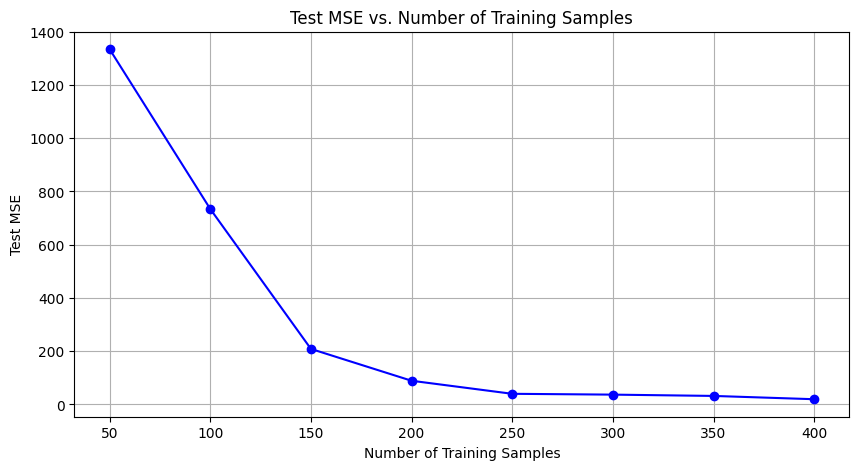

In [139]:
mse_test_values = []
train_sizes = range(50, len(X_train), 50)

for size in train_sizes:
    mse_runs = []
    for _ in range(3):
        weights, _ = sgd(X_train[:size], y_train[:size], lr=0.01)
        y_test_pred = np.dot(X_test, weights)
        mse_runs.append(mse(y_test, y_test_pred))
    mse_test_values.append(np.mean(mse_runs))

plt.figure(figsize=(10, 5))
plt.plot(train_sizes, mse_test_values, marker='o', color='b')
plt.xlabel("Number of Training Samples")
plt.ylabel("Test MSE")
plt.title("Test MSE vs. Number of Training Samples")
plt.grid()
plt.show()

نمودار تغییرات MSE بر حسب نرخ یادگیری

Stopped due to time limit at epoch 84
Stopped due to time limit at epoch 88
Stopped due to time limit at epoch 83
Stopped due to time limit at epoch 101
Stopped due to time limit at epoch 96
Stopped due to time limit at epoch 93
Stopped due to time limit at epoch 100
Stopped due to time limit at epoch 94
Stopped due to time limit at epoch 85
Stopped due to time limit at epoch 104
Stopped due to time limit at epoch 108
Stopped due to time limit at epoch 107
Stopped due to time limit at epoch 105
Stopped due to time limit at epoch 95
Stopped due to time limit at epoch 98


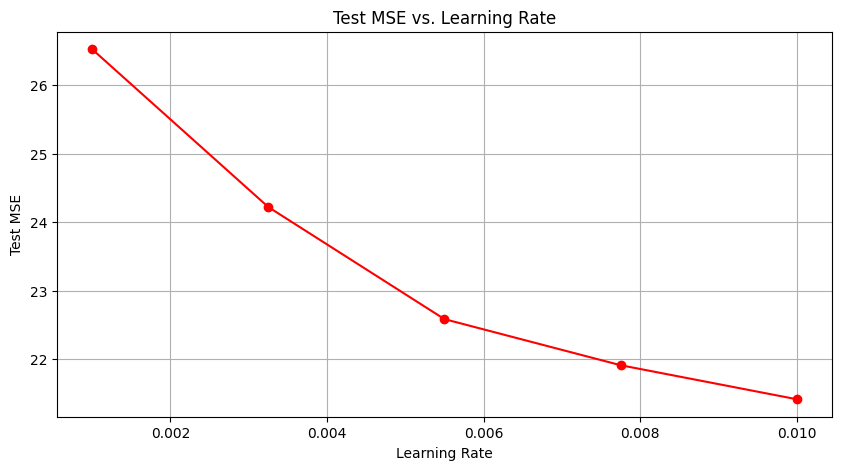

In [140]:
mse_test_values = []
learning_rates = np.linspace(0.001, 0.01, 5)

for lr in learning_rates:
    mse_runs = []
    for _ in range(3):
        weights, _ = sgd(X_train, y_train, lr=lr)
        y_test_pred = np.dot(X_test, weights)
        mse_runs.append(mse(y_test, y_test_pred))
    mse_test_values.append(np.mean(mse_runs))
    

plt.figure(figsize=(10, 5))
plt.plot(learning_rates, mse_test_values, marker='o', color='r')
plt.xlabel("Learning Rate")
plt.ylabel("Test MSE")
plt.title("Test MSE vs. Learning Rate")
plt.grid()
plt.show()


SGD WITH LIB

In [141]:
import random
from sklearn.model_selection import train_test_split


تنظیم رندوم سید برای تقسیم ثابت داده ها
تقسیم داده ها و نرمالسازی و مقدار دهی به بایاس

In [142]:
random.seed(42)
np.random.seed(42)



data = pd.read_csv('boston_housing_dataset.csv') 

X = data.drop(columns='medv').values  
y = data['medv'].values            

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


X_train = np.c_[np.ones(X_train.shape[0]), X_train]  
X_test = np.c_[np.ones(X_test.shape[0]), X_test]


تعریف الگوریتم
این کد از SGDRegressor استفاده می‌کند که خودش یک پیاده‌سازی از الگوریتم Stochastic Gradient Descent (SGD) است، اما به صورت دسته‌ای عمل می‌کند.

مدل اجرا شد

توابع خطا تعریف شدند و مقادیر خطا محاسبه و چاپ شدند

In [143]:
def sgd_sklearn(X, y, lr=0.01, epochs=200, time_limit=cpu_time2):
    np.random.seed(42)
    random.seed(42)
    
    model = SGDRegressor(max_iter=epochs, tol=0, eta0=lr, random_state=42)
    
  
    start_time = time.time()

  
    for epoch in range(epochs):
        model.partial_fit(X, y)  
        
    
        if time.time() - start_time > time_limit:
            print(f"Stopped due to time limit at epoch {epoch + 1}")
            break
    
    return model


def sse(y_true, y_pred):
    return np.sum((y_true - y_pred) ** 2)


model = sgd_sklearn(X_train, y_train, lr=0.01)


y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


mse_train = np.mean((y_train - y_train_pred) ** 2)
mse_test = np.mean((y_test - y_test_pred) ** 2)
sse_train = sse(y_train, y_train_pred)
sse_test = sse(y_test, y_test_pred)


print("Final Weights:", model.coef_)
print("Final Bias:", model.intercept_)
print("Train MSE:", mse_train)
print("Test MSE:", mse_test)
print("Train SSE:", sse_train)
print("Test SSE:", sse_test)


Stopped due to time limit at epoch 3
Final Weights: [11.43156325  0.07287066 -0.5719981   0.27411016 -0.35537123  1.11732887
 -0.77186818  3.58836321  0.08958342 -1.65678655  0.37137382 -0.41993451
 -1.60982926  1.13176296 -3.19722645]
Final Bias: [11.4341126]
Train MSE: 22.972290050819222
Test MSE: 26.686132806772022
Train SSE: 9280.805180530966
Test SSE: 2721.9855462907462


نمودار تغییرات خطا بر حسب تعداد نمونه های یادگیری

Stopped due to time limit at epoch 3
Stopped due to time limit at epoch 4
Stopped due to time limit at epoch 6
Stopped due to time limit at epoch 6
Stopped due to time limit at epoch 7
Stopped due to time limit at epoch 10
Stopped due to time limit at epoch 5
Stopped due to time limit at epoch 8


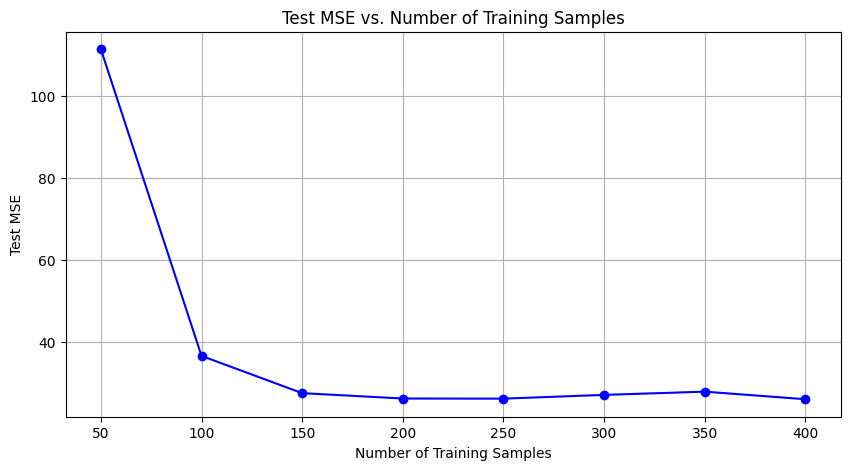

In [144]:
mse_test_values = []
train_sizes = range(50, X_train.shape[0], 50)

for size in train_sizes:
    np.random.seed(42)
    random.seed(42)
    
    model = sgd_sklearn(X_train[:size], y_train[:size], lr=0.01)
    y_test_pred = model.predict(X_test)
    mse_test_values.append(np.mean((y_test - y_test_pred) ** 2))

plt.figure(figsize=(10, 5))
plt.plot(train_sizes, mse_test_values, marker='o', color='b')
plt.xlabel("Number of Training Samples")
plt.ylabel("Test MSE")
plt.title("Test MSE vs. Number of Training Samples")
plt.grid()
plt.show()

نمودار تغییرات خطا بر اساس تغییرات نرخ یادگیری

Stopped due to time limit at epoch 4
Stopped due to time limit at epoch 3
Stopped due to time limit at epoch 3
Stopped due to time limit at epoch 5
Stopped due to time limit at epoch 6


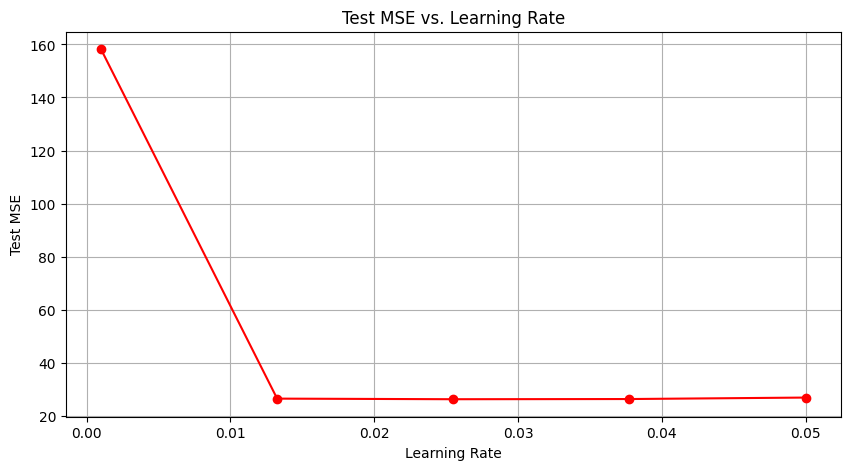

In [145]:

mse_test_values = []
learning_rates = np.linspace(0.001, 0.05, 5)

for lr in learning_rates:
    np.random.seed(42)
    random.seed(42)
    
    model = sgd_sklearn(X_train, y_train, lr=lr)
    y_test_pred = model.predict(X_test)
    mse_test_values.append(np.mean((y_test - y_test_pred) ** 2))

plt.figure(figsize=(10, 5))
plt.plot(learning_rates, mse_test_values, marker='o', color='r')
plt.xlabel("Learning Rate")
plt.ylabel("Test MSE")
plt.title("Test MSE vs. Learning Rate")
plt.grid()
plt.show()
